In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from pandas import DataFrame

C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


C:\Users\hp\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


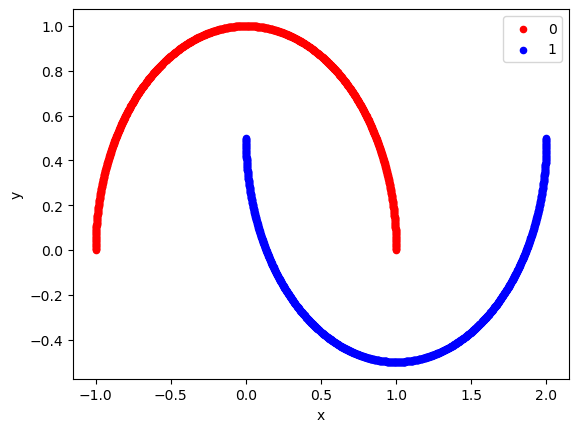

In [2]:
# generate 2d classification dataset
X, y = make_moons(n_samples=2000)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [9]:
df

,x,y,label
0,0.372856,0.927889,0
1,1.988629,0.349625,1
2,1.994941,0.399538,1
3,0.358221,0.933637,0
4,-0.808647,0.588294,0
...,...,...,...
1995,0.033014,0.999455,0
1996,1.806793,-0.090834,1
1997,1.127018,-0.491900,1
1998,0.182931,0.983126,0


In [3]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)


In [4]:
x_train=train.iloc[:,0:2]
y_train=train.iloc[:,1]
c_train=train.iloc[:,2]
x_test=test.iloc[:,0:2]
y_test=test.iloc[:,1]
c_test=test.iloc[:,2]

In [38]:
x_test

,x,y
1273,1.945978,0.175770
1395,0.223944,-0.130664
1688,1.173648,-0.484808
1479,-0.349397,0.936975
526,-0.778036,0.628220
...,...,...
201,0.016022,0.321708
1548,-0.997385,0.072266
749,0.000005,0.496855
1878,-0.965313,0.261097


In [5]:
import tensorflow as tf
import numpy as np
import keras
#from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical

In [6]:
model = Sequential()
model.add(Dense(2, input_shape=(2, ), activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 20)                60        
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 87 (348.00 Byte)
Trainable params: 87 (348.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
#model.fit(x, y, epochs=100)

In [8]:
model.fit(x_train, c_train, epochs=100)

Epoch 1/100


50/50 [==============================] - 1s 3ms/step - loss: 0.6736 - accuracy: 0.5931
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 0.5087 - accuracy: 0.8650
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 0.4002 - accuracy: 0.8631
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 0.3398 - accuracy: 0.8625
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 0.3083 - accuracy: 0.8675
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2904 - accuracy: 0.8700
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2794 - accuracy: 0.8744
Epoch 8/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2720 - accuracy: 0.8775
Epoch 9/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2669 - accuracy: 0.8800
Epoch 10/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2631 - accuracy: 0.8825
Epoch 1

50/50 [==============================] - 0s 2ms/step - loss: 0.2489 - accuracy: 0.8888
Epoch 79/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2485 - accuracy: 0.8906
Epoch 80/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2491 - accuracy: 0.8894
Epoch 81/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2488 - accuracy: 0.8881
Epoch 82/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2484 - accuracy: 0.8888
Epoch 83/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2485 - accuracy: 0.8906
Epoch 84/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2483 - accuracy: 0.8906
Epoch 85/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2485 - accuracy: 0.8900
Epoch 86/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2483 - accuracy: 0.8888
Epoch 87/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2482 - accuracy: 0.8894
Epoch 88/100


In [33]:
predictions=model.predict(X)

63/63 [==============================] - 0s 3ms/step


In [34]:
# Apply a threshold (e.g., 0.5) to convert probabilities to class labels
y_pred = np.array((predictions > 0.5).astype(int) )

In [17]:
cl=np.array(c_test)

In [ ]:
y_pred-

In [25]:
DataFrame(c_test).info

<bound method DataFrame.info of       label
865       0
1020      1
1069      0
408       0
205       1
...     ...
463       0
1989      0
1150      0
917       0
550       0

[400 rows x 1 columns]>

In [20]:
c_test.iloc[:,0]-y_pred.iloc[:,0]

IndexingError: Too many indexers

In [31]:
Z = predict(model, np.c_[xx.ravel(), yy.ravel()])

NameError: name 'predict' is not defined

In [9]:
def predict(model, X):
    # Assuming your model predicts probabilities, apply a threshold (0.5)
    predictions = (model.predict(X)[:, 0] > 0.5).astype(int)
    return predictions

In [10]:
# Create a mesh grid for plotting the decision boundary
h = 0.02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class labels for each point in the mesh
Z = predict(model, np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

1368/1368 [==============================] - 3s 2ms/step


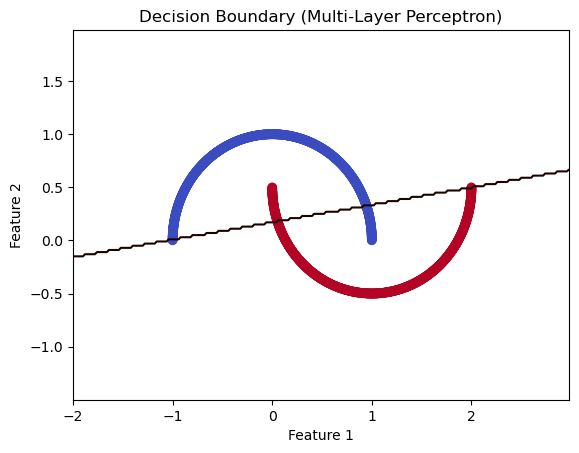

In [12]:
# Plot the moons data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, alpha=0.7)

# Plot the decision boundary contour
plt.contour(xx, yy, Z,cmap='pink', levels=[0.5])

# Set labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary (Multi-Layer Perceptron)')
plt.show()